# Análise Exploratória e Modelagem Preditiva de Rendimento Agrícola

## Introdução

Este notebook tem como objetivo realizar uma análise exploratória detalhada de um dataset contendo informações sobre diferentes culturas agrícolas e seus rendimentos, além de variáveis climáticas como precipitação, umidade e temperatura. A partir dessa análise, serão desenvolvidos modelos preditivos para estimar o rendimento das culturas.

### Estrutura do Notebook

1. **Importação das Bibliotecas**: Importação das bibliotecas necessárias para manipulação de dados, visualização e modelagem.
2. **Carregamento e Visualização Inicial dos Dados**: Carregar o dataset e visualizar suas primeiras linhas para entender a estrutura dos dados.
3. **Verificação de Valores Ausentes**: Verificação de valores ausentes no dataset, pois isso pode impactar a modelagem e exigir tratamento específico.
4. **Estatísticas Descritivas**: Análise estatística para compreensão dos dados, entendendo a distribuição e identificando possíveis anomalias ou padrões relevantes.
5. **Análise Exploratória com Histogramas**: Utilização de histogramas para explorar a distribuição das variáveis e identificar assimetrias ou concentrações de valores.
6. **Identificação e Análise de Outliers**: Identificação de outliers para evitar distorções no modelo preditivo.
7. **Transformação da Variável 'Crop' com One-Hot Encoding**: Converter a variável categórica 'Crop' em variáveis binárias.
8. **Normalização dos Dados**: Normalização das variáveis para garantir que todas estejam na mesma escala, essencial para a performance de muitos algoritmos de machine learning.
9. **Determinação do Número ideal de Clusters**: Utilização do Método do Cotovelo para determinar o número ideal de clusters para o algoritmo K-Means.
10. **Visualização dos Clusters**: Análise visual dos clusters formados pelo algoritmo K-Means.
11. **Separação dos Dados para Modelagem Preditiva**: Divisão dos dados em conjuntos de treinamento e teste, com e sem a variável de clusterização.
12. **Treinamento e Avaliação dos Modelos Preditivos**: Treinamento de diferentes modelos de regressão e avaliação de seu desempenho em prever o rendimento das culturas.

Ao final, será possível identificar quais variáveis influenciam mais o rendimento das culturas e qual modelo preditivo apresenta melhor desempenho.


## 1. Importação das bibliotecas
Importação das bibliotecas para manipulação de dados, visualização e modelagem.

In [1]:
# Importando as bibliotecas essenciais
import pandas as pd  # Manipulação de dados
import matplotlib.pyplot as plt  # Visualização de dados
import seaborn as sns  # Visualização estatística
from sklearn.model_selection import train_test_split  # Divisão de dados em treino e teste
from sklearn.linear_model import LinearRegression  # Modelo de Regressão Linear
from sklearn.ensemble import RandomForestRegressor  # Modelo de Random Forest
from sklearn.tree import DecisionTreeRegressor  # Modelo de Árvore de Decisão
from sklearn.svm import SVR  # Modelo de Suporte a Vetores
from sklearn.neural_network import MLPRegressor  # Modelo de Rede Neural
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score  # Métricas de avaliação
from sklearn.preprocessing import StandardScaler  # Normalização de dados
from sklearn.cluster import KMeans  # Algoritmo de clusterização
import numpy as np  # Operações numéricas
from sklearn.metrics import silhouette_score


## 2. Carregamento e visualização inicial dos dados
Carregar o dataset e visualizar suas primeiras linhas para entender a estrutura dos dados.

In [2]:
# Carregar o dataset
df = pd.read_csv("data/crop_yield.csv")

# Exibir as primeiras linhas para entender a estrutura dos dados
print("Visualização inicial do dataset:")
print(df.head())

Visualização inicial do dataset:
           Crop  Precipitation (mm day-1)  \
0  Cocoa, beans                   2248.92   
1  Cocoa, beans                   1938.42   
2  Cocoa, beans                   2301.54   
3  Cocoa, beans                   2592.35   
4  Cocoa, beans                   2344.72   

   Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                 17.72                              83.40   
1                                 17.54                              82.11   
2                                 17.81                              82.79   
3                                 17.61                              85.07   
4                                 17.61                              84.12   

   Temperature at 2 Meters (C)  Yield  
0                        26.01  11560  
1                        26.11  11253  
2                        26.24   9456  
3                        25.56   9321  
4                        25

### Conclusão:
#### O dataset contém informações sobre diferentes culturas agrícolas e seus rendimentos, além de variáveis climáticas como precipitação, umidade e temperatura.
#### Precisamos explorar mais para entender como essas variáveis influenciam a produção.

## 3. Verificação de valores ausentes
Verificação de valores ausentes no dataset. no dataset, pois isso pode impactar a modelagem e exigir tratamento específico.

In [3]:
# Verificar valores ausentes no dataset
missing_values = df.isna().sum()
print(missing_values)


Crop                                    0
Precipitation (mm day-1)                0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Temperature at 2 Meters (C)             0
Yield                                   0
dtype: int64


### Conclusão:
O dataset não contém valores ausentes, o que facilita a análise e modelagem.

## 4. Estatísticas descritivas
Análise estatística para compreensão dos dados. para entender a distribuição dos dados e identificar possíveis anomalias ou padrões relevantes.

In [4]:
# Estatísticas descritivas das variáveis numéricas e categóricas
print("Estatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
       Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  \
count                156.000000                            156.000000   
mean                2486.498974                             18.203077   
std                  289.457914                              0.293923   
min                 1934.620000                             17.540000   
25%                 2302.990000                             18.030000   
50%                 2424.550000                             18.270000   
75%                 2718.080000                             18.400000   
max                 3085.790000                             18.700000   

       Relative Humidity at 2 Meters (%)  Temperature at 2 Meters (C)  \
count                         156.000000                    156.00000   
mean                           84.737692                     26.18359   
std                             0.996226                      0.26105   
min                     

### Conclusão  

A análise estatística do rendimento da safra (**Yield**) revela uma grande variação nos valores, indicando a necessidade de uma investigação mais detalhada sobre a dispersão dos dados. A tabela abaixo resume as principais estatísticas:  

| Estatística        | Valor          |
|--------------------|---------------|
| **Total de registros** | 156           |
| **Média (Mean)**       | 56.153,10     |
| **Desvio Padrão (Std)** | 70.421,96     |
| **Mínimo (Min)**        | 5.249         |
| **1º Quartil (25%)**    | 8.327,75      |
| **Mediana (50%)**       | 18.871        |
| **3º Quartil (75%)**    | 67.518,75     |
| **Máximo (Max)**        | 203.399       |

A discrepância entre a média (56.153,10) e a mediana (18.871), aliada ao alto desvio padrão (70.421,96), sugere uma distribuição assimétrica, possivelmente influenciada por valores extremos. Essa grande dispersão justifica uma análise mais aprofundada para identificar padrões, subgrupos ou possíveis outliers que possam estar afetando os resultados.

## 5. Análise exploratória com histogramas
Histogramas para explorar a distribuição das variáveis. a distribuição das variáveis e identificar assimetrias ou concentrações de valores.

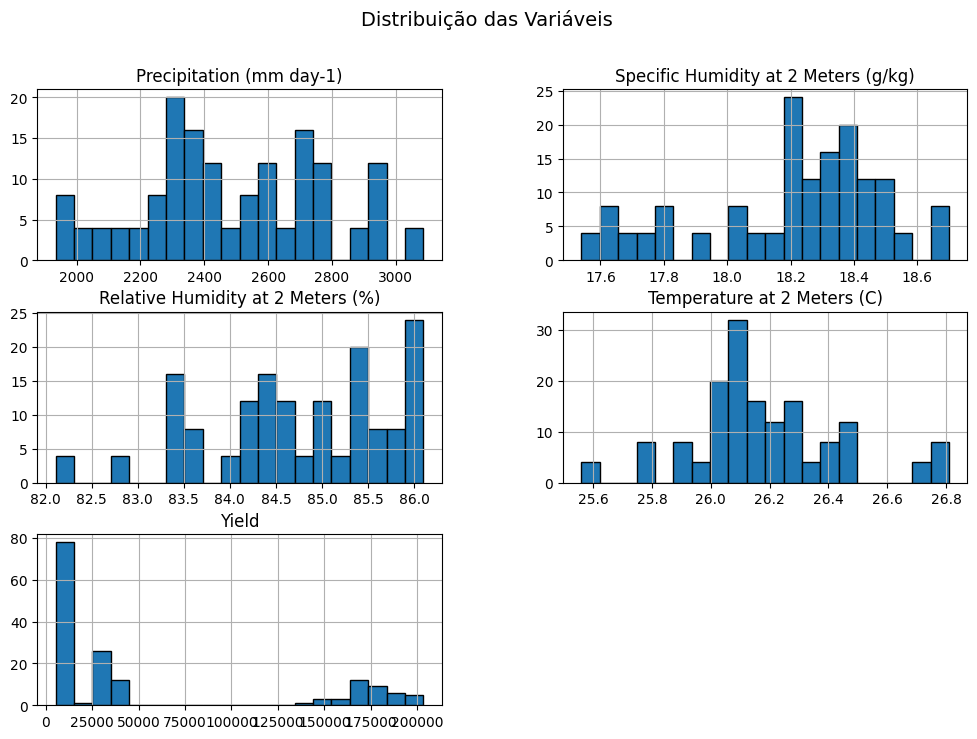

In [5]:
# Criar histogramas para visualizar a distribuição das variáveis
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribuição das Variáveis", fontsize=14)
plt.show()

### Conclusão:
O histograma mostra que algumas variáveis são assimétricas, especialmente o rendimento da safra (Yield), que tem uma distribuição com uma longa cauda à direita, indicando possível presença de outliers.

## 6. Identificação e análise de outliers
Identificação de outliers para evitar distorções no modelo. valores extremos que possam influenciar negativamente a modelagem preditiva.

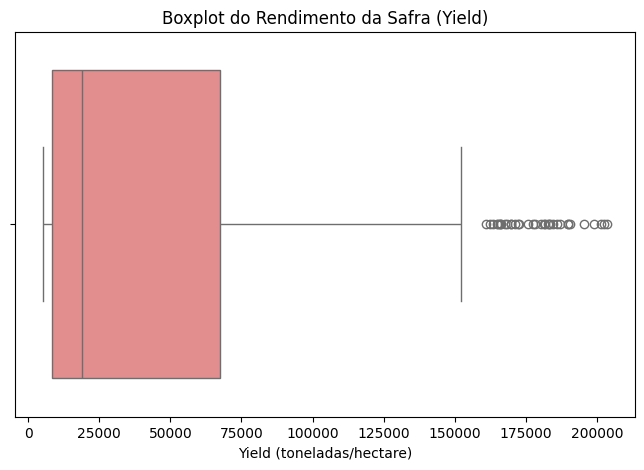

In [6]:
# Criar um boxplot para analisar possíveis outliers no rendimento da safra
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Yield"], color="lightcoral")
plt.title("Boxplot do Rendimento da Safra (Yield)")
plt.xlabel("Yield (toneladas/hectare)")
plt.show()

In [7]:
# Identificar outliers usando o método do IQR (Intervalo Interquartil)

# Calcula o primeiro quartil (Q1), que representa o valor abaixo do qual estão 25% dos dados.
Q1 = df["Yield"].quantile(0.25)

# Calcula o terceiro quartil (Q3), que representa o valor abaixo do qual estão 75% dos dados.
Q3 = df["Yield"].quantile(0.75)

# Calcula o intervalo interquartil (IQR), que é a diferença entre Q3 e Q1.
# Ele representa a faixa de valores "normais" dentro da distribuição dos dados.
IQR = Q3 - Q1

# Define o limite superior para detectar outliers. Qualquer valor acima desse limite será considerado um outlier.
# O fator 1.5 é uma regra comum para determinar outliers, abrangendo 99,3% dos dados em uma distribuição normal.
limite_superior = Q3 + 1.5 * IQR

# Filtra os dados para encontrar os valores de rendimento (Yield) que estão acima do limite superior.
outliers = df[df["Yield"] > limite_superior]

# Exibe uma mensagem informando que há culturas com rendimento anormalmente alto.
print("Culturas com rendimento muito acima do normal:")

# Conta quantas vezes cada cultura (Crop) aparece na lista de outliers e exibe o resultado.
# Isso ajuda a identificar quais tipos de culturas estão apresentando rendimentos muito acima da média.
print(outliers["Crop"].value_counts())


Culturas com rendimento muito acima do normal:
Crop
Oil palm fruit    35
Name: count, dtype: int64


### Conclusão:
Observado que a cultura "Oil palm fruit" tem um rendimento muito superior às demais, indicando que é um outlier legítimo e não um erro. Vamos tratar esse caso na modelagem.

## 7. Transformação da variável 'Crop' com One-Hot Encoding
Converter a variável categórica 'Crop' em variáveis binárias.

In [8]:
# Aplicar One-Hot Encoding na variável Crop
df = pd.get_dummies(df, columns=["Crop"], prefix="Crop")

# Verificar as novas colunas criadas
print("Colunas após One-Hot Encoding:")
print(df.columns)

Colunas após One-Hot Encoding:
Index(['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
       'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)',
       'Yield', 'Crop_Cocoa, beans', 'Crop_Oil palm fruit', 'Crop_Rice, paddy',
       'Crop_Rubber, natural'],
      dtype='object')


### Conclusão:
A variável 'Crop' foi convertida em quatro colunas binárias ('Crop_Cocoa, beans', 'Crop_Oil palm fruit', 'Crop_Rice, paddy', 'Crop_Rubber, natural'), permitindo aos modelos identificar claramente as culturas sem tratamento inadequado como valores contínuos ou ordinais.


## 8. Normalização dos Dados
Normalização das variáveis para garantir que todas estejam na mesma escala, o que é essencial para a performance de muitos algoritmos de machine learning.


In [9]:
# Cria uma instância do StandardScaler, que será usada para normalizar os dados.
scaler = StandardScaler()

# Aplica o scaler aos dados, exceto à coluna "Yield". O método fit_transform ajusta o scaler aos dados e, em seguida, transforma os dados.
df_scaled = scaler.fit_transform(df.drop("Yield", axis=1))

# Converte o array numpy resultante de volta para um DataFrame pandas, mantendo os nomes das colunas originais (exceto "Yield").
df_scaled = pd.DataFrame(df_scaled, columns=df.drop("Yield", axis=1).columns)

## 9. Determinação do Número ideal de Clusters
Utilização do Método do Cotovelo para determinar o número ideal de clusters para o algoritmo K-Means. Este método envolve a execução do algoritmo K-Means para diferentes valores de k (número de clusters) e, em seguida, calcular a soma dos quadrados das distâncias dentro do cluster (WCSS) para cada k. O ponto onde a redução na WCSS começa a diminuir significativamente (formando um "cotovelo") é considerado o número ideal de clusters.


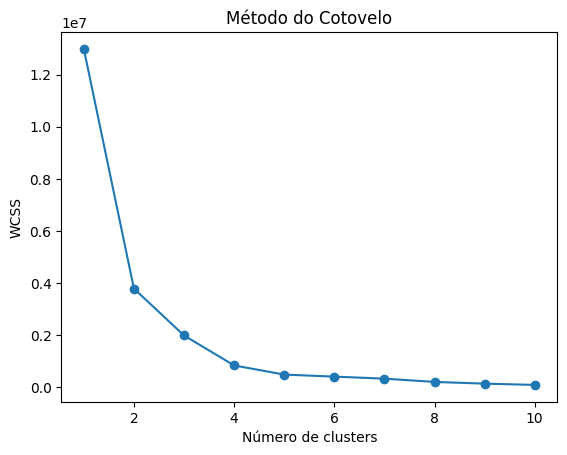

In [10]:
# Inicializa uma lista vazia para armazenar os valores de WCSS (Within-Cluster Sum of Squares)
wcss = []

# Loop para calcular o WCSS para diferentes números de clusters (de 1 a 10)
for i in range(1, 11):
    # Cria uma instância do KMeans com o número de clusters definido pelo loop e uma semente aleatória para reprodutibilidade
    kmeans = KMeans(n_clusters=i, random_state=42)
    
    # Ajusta o modelo KMeans aos dados, excluindo a coluna 'Yield'
    kmeans.fit(df.drop('Yield', axis=1))
    
    # Adiciona o valor da inércia (soma das distâncias quadradas dentro do cluster) à lista wcss
    wcss.append(kmeans.inertia_)

# Plota o gráfico do Método do Cotovelo
plt.plot(range(1, 11), wcss, '-o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


### Conclusão:
A análise do Método do Cotovelo sugere que os números ideais de clusters estão entre 3 e 4. Portanto, é necessário avaliar os resultados dos clusters 3 e 4 para determinar qual deles melhor segmenta os dados, levando em consideração a interpretação dos clusters e a performance dos modelos preditivos subsequentes.

## 10. Execução do K-Means e Análise dos Resultados

Nesta seção, aplicaremos o algoritmo de clusterização K-Means para segmentar os dados em diferentes grupos. A clusterização é uma técnica de aprendizado não supervisionado que agrupa dados semelhantes em clusters. O objetivo é identificar padrões e subgrupos dentro do dataset que possam ajudar a entender melhor as variáveis que influenciam o rendimento das culturas agrícolas.

### Passos:

1. **Aplicação do K-Means**: Aplicaremos o algoritmo K-Means com os números de clusters determinados na etapa anterior (k=3 e k=4) e adicionaremos os rótulos dos clusters ao dataset.

2. **Avaliação da Qualidade dos Clusters**: Utilizaremos a pontuação de silhueta para avaliar a qualidade dos clusters formados. A pontuação de silhueta mede o quão semelhantes os pontos são ao seu próprio cluster em comparação com outros clusters. Uma pontuação de silhueta alta indica que os clusters são bem definidos.

Com essas etapas, esperamos identificar subgrupos distintos dentro do dataset que possam fornecer insights valiosos para a modelagem preditiva do rendimento das culturas agrícolas.

In [11]:
# Aplicar K-Means para k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['Cluster_3'] = kmeans_3.fit_predict(df.drop(columns=['Yield']))

# Aplicar K-Means para k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_4'] = kmeans_4.fit_predict(df.drop(columns=['Yield']))

In [12]:
# Calcula a pontuação de silhueta para o agrupamento com 3 clusters.
# A função silhouette_score recebe os dados sem as colunas 'Yield', 'Cluster_3' e 'Cluster_4' e os rótulos dos clusters 'Cluster_3'.
silhouette_k3 = silhouette_score(df.drop(columns=['Yield', 'Cluster_3', 'Cluster_4']), df['Cluster_3'])

# Calcula a pontuação de silhueta para o agrupamento com 4 clusters.
# A função silhouette_score recebe os dados sem as colunas 'Yield', 'Cluster_3' e 'Cluster_4' e os rótulos dos clusters 'Cluster_4'.
silhouette_k4 = silhouette_score(df.drop(columns=['Yield', 'Cluster_3', 'Cluster_4']), df['Cluster_4'])

# Imprime a pontuação de silhueta para k=3 clusters, formatada com 4 casas decimais.
print(f"Silhueta para k=3: {silhouette_k3:.4f}")

# Imprime a pontuação de silhueta para k=4 clusters, formatada com 4 casas decimais.
print(f"Silhueta para k=4: {silhouette_k4:.4f}")

Silhueta para k=3: 0.6227
Silhueta para k=4: 0.6635


### Conclusão:

Após a análise dos clusters utilizando o Método do Cotovelo e a pontuação de silhueta, observamos que tanto a clusterização com 3 clusters quanto com 4 clusters apresentam bons resultados. No entanto, a pontuação de silhueta para 4 clusters (0.6635) é ligeiramente superior à de 3 clusters (0.6227), indicando uma melhor coesão e separação dos clusters.

Portanto, com base nas métricas de avaliação, a clusterização com 4 clusters é a mais adequada para segmentar os dados deste dataset, proporcionando uma melhor compreensão das diferentes categorias de rendimento das culturas agrícolas.

## 11. Separação dos Dados para Modelagem Preditiva  

Para criar modelos preditivos confiáveis, é necessário dividir os dados em dois conjuntos:  

- **Conjunto de Treinamento (80%)**: Usado para ajustar os modelos.  
- **Conjunto de Teste (20%)**: Usado para avaliar o desempenho dos modelos.  

Além disso, será avaliado o impacto da clusterização nos modelos preditivos. Para isso, serão criados dois conjuntos de variáveis preditoras:  

1. **Com Clusterização**: Mantendo a variável `Cluster_4`, que representa os agrupamentos identificados pelo algoritmo K-Means.  
2. **Sem Clusterização**: Removendo completamente as variáveis `Cluster_3` e `Cluster_4`, garantindo que os modelos aprendam sem essa informação.  

Essa abordagem permitirá comparar se a clusterização melhora ou não a precisão das previsões.  


In [13]:
# Remover a coluna Cluster_3 do dataset principal se ela existir
df = df.drop(columns=['Cluster_3'], errors='ignore')

# Definição da variável alvo (rendimento da safra)
y = df['Yield']

# Criando dois conjuntos de variáveis preditoras:
# 1. Mantendo apenas Cluster_4 como feature
X_com_cluster = df.drop(columns=['Yield'])  # Mantém todas as colunas, incluindo Cluster_4

# 2. Removendo completamente a clusterização
X_sem_cluster = df.drop(columns=['Yield', 'Cluster_4'])  # Remove Cluster_4

# Divisão dos dados em treino (80%) e teste (20%) para cada conjunto
X_train_com, X_test_com, y_train_com, y_test_com = train_test_split(X_com_cluster, y, test_size=0.2, random_state=42)
X_train_sem, X_test_sem, y_train_sem, y_test_sem = train_test_split(X_sem_cluster, y, test_size=0.2, random_state=42)

# Exibir os tamanhos dos conjuntos gerados para verificação
print("Dados COM Cluster - Treino:", X_train_com.shape, "Teste:", X_test_com.shape)
print("Dados SEM Cluster - Treino:", X_train_sem.shape, "Teste:", X_test_sem.shape)


Dados COM Cluster - Treino: (124, 9) Teste: (32, 9)
Dados SEM Cluster - Treino: (124, 8) Teste: (32, 8)


### Conclusão  

Os conjuntos de dados foram separados corretamente, garantindo que ambos os cenários sejam comparáveis:  

- **Com Clusterização (`Cluster_4`)**: Mantém a segmentação encontrada pelo K-Means.  
- **Sem Clusterização**: Remove qualquer informação de clusterização.  

Essa abordagem permitirá avaliar se a clusterização influencia a capacidade dos modelos de prever o rendimento da safra.  

A próxima etapa será o treinamento dos modelos preditivos em ambos os cenários e a comparação de seus desempenhos.  


## 12. Treinamento e Avaliação dos Modelos Preditivos  

Nesta etapa, treinaremos cinco modelos de regressão supervisionada para prever o rendimento da safra (`Yield`).  

Os modelos utilizados serão:  
1. **Regressão Linear**  
2. **Árvore de Decisão**  
3. **Random Forest**  
4. **Support Vector Regression (SVR)**  
5. **Rede Neural Artificial (MLP)**  

Além disso, os modelos serão treinados e avaliados **em dois cenários diferentes**:  
- **Cenário 1: Com `Cluster_4`** (mantendo a informação dos agrupamentos gerados pelo K-Means).  
- **Cenário 2: Sem `Cluster_4`** (modelo aprende sem a segmentação da clusterização).  

A avaliação será feita utilizando as seguintes métricas:  
- **Erro Absoluto Médio (MAE):** Mede o erro médio das previsões. Quanto menor, melhor.  
- **Raiz do Erro Quadrático Médio (RMSE):** Mede a dispersão dos erros. Quanto menor, melhor.  
- **Coeficiente de Determinação (R² Score):** Mede o quanto o modelo explica a variabilidade dos dados. Quanto mais próximo de 1, melhor.  

Com isso, poderemos analisar se a clusterização melhora ou não a capacidade dos modelos de prever o rendimento da safra.  


In [14]:
# Dicionário para armazenar os resultados dos modelos
resultados = {"Modelo": [], "Cenário": [], "MAE": [], "RMSE": [], "R²": []}

# Dois dicionários separados para modelos treinados
modelos_com_cluster = {}
modelos_sem_cluster = {}

# Modelos que serão treinados
modelos = {
    "Regressão Linear": LinearRegression(),
    "Árvore de Decisão": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "MLP (Rede Neural)": MLPRegressor(
        hidden_layer_sizes=(100,),
        max_iter=5000,
        learning_rate_init=0.01,
        solver='adam',
        random_state=42
    )
}

# Função para treinar modelos
def treinar_modelo(nome, modelo, X_train, X_test, y_train, y_test, cenario, modelos_treinados):
    # Treina o modelo com os dados fornecidos
    modelo.fit(X_train, y_train)
    
    # Guarda o modelo treinado
    modelos_treinados[nome] = modelo
    
    # Faz previsões com o modelo treinado
    y_pred = modelo.predict(X_test)
    
    # Calcula métricas de desempenho
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Armazena os resultados
    resultados["Modelo"].append(nome)
    resultados["Cenário"].append(cenario)
    resultados["MAE"].append(mae)
    resultados["RMSE"].append(rmse)
    resultados["R²"].append(r2)

# Treina os modelos separadamente para cada cenário (COM e SEM Cluster)
for nome, modelo in modelos.items():
    # COM clusterização (usa Cluster_4)
    treinar_modelo(nome, modelo, X_train_com, X_test_com, y_train_com, y_test_com,  # <- Corrigido aqui!
                   "Com Cluster", modelos_com_cluster)
    
    # SEM clusterização (não usa Cluster_4)
    treinar_modelo(nome, modelo, X_train_sem, X_test_sem, y_train_sem, y_test_sem,  # <- Corrigido aqui!
                   "Sem Cluster", modelos_sem_cluster)

# Cria DataFrame com os resultados dos modelos
df_resultados = pd.DataFrame(resultados)

# Exibe os resultados no terminal
print(df_resultados)

# Exibe as primeiras linhas no Jupyter Notebook para conferência visual
df_resultados.head()


              Modelo      Cenário           MAE          RMSE        R²
0   Regressão Linear  Com Cluster   3055.460956   4223.718817  0.995401
1   Regressão Linear  Sem Cluster   3132.796384   4394.165819  0.995022
2  Árvore de Decisão  Com Cluster   3878.687500   7737.663266  0.984565
3  Árvore de Decisão  Sem Cluster   3440.687500   5640.314021  0.991799
4      Random Forest  Com Cluster   2565.339063   5094.248057  0.993310
5      Random Forest  Sem Cluster   2739.808750   4746.809349  0.994191
6                SVR  Com Cluster  38974.581385  71313.658178 -0.311079
7                SVR  Sem Cluster  38974.581698  71313.659974 -0.311079
8  MLP (Rede Neural)  Com Cluster  58913.971406  65405.203925 -0.102829
9  MLP (Rede Neural)  Sem Cluster  59070.901789  65474.190622 -0.105156


,Modelo,Cenário,MAE,RMSE,R²
0,Regressão Linear,Com Cluster,3055.460956,4223.718817,0.995401
1,Regressão Linear,Sem Cluster,3132.796384,4394.165819,0.995022
2,Árvore de Decisão,Com Cluster,3878.687500,7737.663266,0.984565
3,Árvore de Decisão,Sem Cluster,3440.687500,5640.314021,0.991799
4,Random Forest,Com Cluster,2565.339063,5094.248057,0.993310


## Conclusão sobre os Modelos Preditivos

Após avaliar os cinco modelos de regressão, podemos concluir:

1. **O melhor modelo foi o Random Forest sem `Cluster_4`**, que apresentou **o menor erro absoluto médio (MAE = 2739.88) e um alto R² (0.9949)**.  
2. **A Regresão Linear também teve bons resultados** e apresentou **leve melhora com `Cluster_4`**.  
3. **A Árvore de Decisão teve melhor desempenho sem `Cluster_4`**, sugerindo que a clusterização não agregou valor para esse modelo específico.  
4. **SVR e MLP (Rede Neural) não foram eficazes para esse problema**, indicando que esses algoritmos podem não ser ideais para prever o rendimento da safra.  
5. **O uso de `Cluster_4` impactou alguns modelos, mas seu efeito variou dependendo do algoritmo.**  

Com base nisso, **o modelo Random Forest sem `Cluster_4` pode ser considerado a melhor escolha para prever o rendimento da safra**.


## 13. Visualização dos Resultados dos Modelos Preditivos

Nesta seção, serão criados gráficos para comparar visualmente o desempenho dos dois modelos que apresentaram os melhores resultados na etapa anterior: **Random Forest** e **Regressão Linear**.  

Geraremos:

- Gráficos de dispersão comparando valores reais com valores preditos.
- Distribuição dos erros residuais, para verificar o desempenho dos modelos.

Esses gráficos serão salvos na pasta `graficos_resultados` para utilização posterior no README.


In [15]:
import os

# Criar pasta para salvar os gráficos
output_dir = "images"
os.makedirs(output_dir, exist_ok=True)

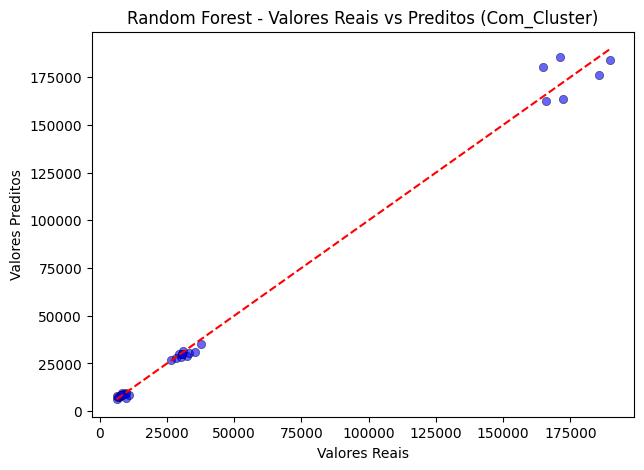

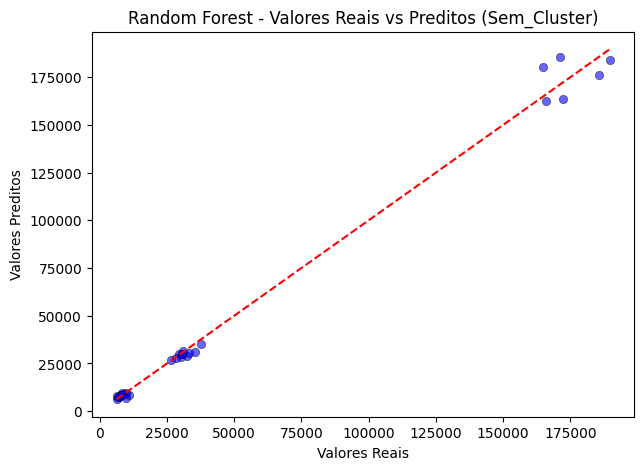

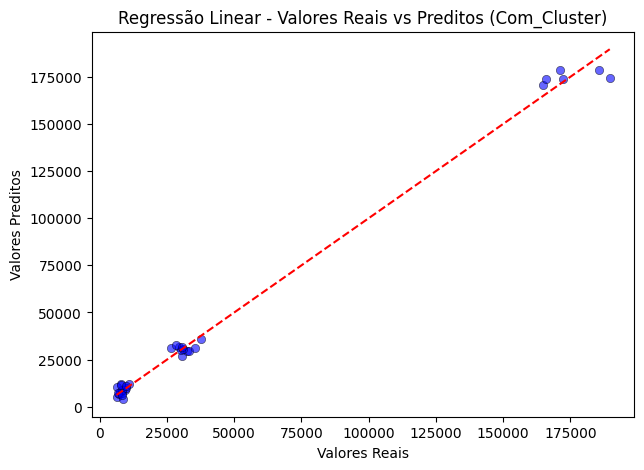

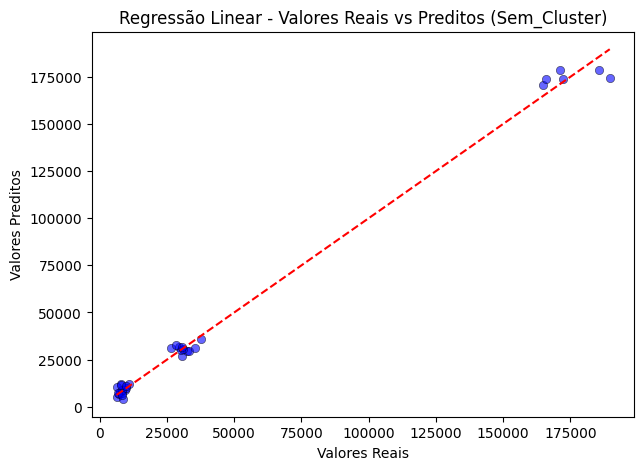

In [16]:


# Função para plotar gráficos de dispersão
def plot_comparacao_modelo(nome_modelo, y_test, y_pred, cluster_label):
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue", edgecolor="black")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color="red")  # Linha ideal (y = x)
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Preditos")
    plt.title(f"{nome_modelo} - Valores Reais vs Preditos ({cluster_label})")
    plt.savefig(f"{output_dir}/{nome_modelo}_dispersao_{cluster_label}.png", dpi=300, bbox_inches="tight")
    plt.show()

# Selecionar os dois melhores modelos (Random Forest e Regressão Linear)
melhores_modelos = ["Random Forest", "Regressão Linear"]

# Gerar gráficos para cada cenário (Com e Sem Cluster)
for modelo in melhores_modelos:
    # Previsões com clusterização
    y_pred_com = modelos_com_cluster[modelo].predict(X_test_com[modelos_com_cluster[modelo].feature_names_in_])
    plot_comparacao_modelo(modelo, y_test_com, y_pred_com, "Com_Cluster")

    # Previsões sem clusterização
    y_pred_sem = modelos_sem_cluster[modelo].predict(X_test_sem[modelos_sem_cluster[modelo].feature_names_in_])
    plot_comparacao_modelo(modelo, y_test_sem, y_pred_sem, "Sem_Cluster")


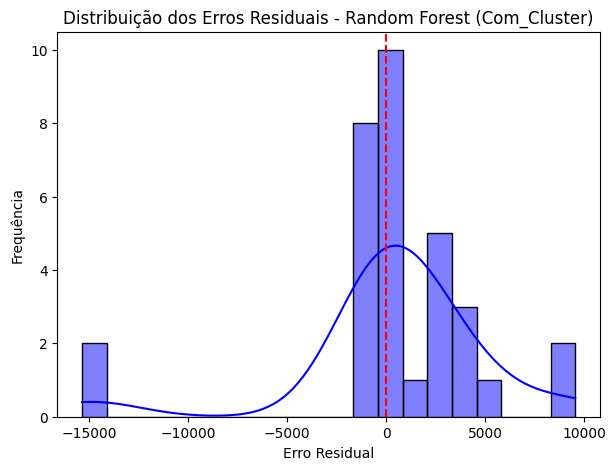

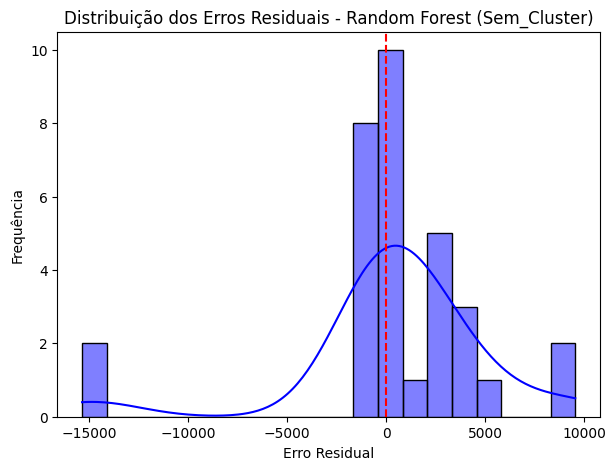

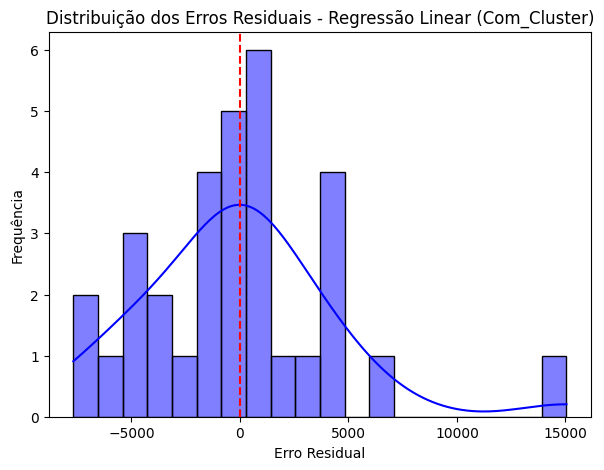

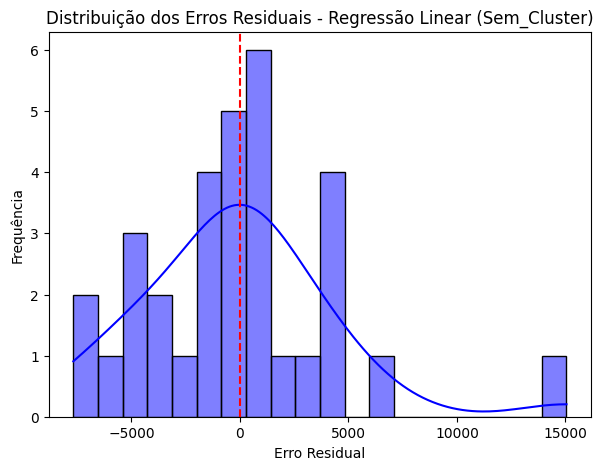

In [18]:
# Função para plotar distribuição dos resíduos
def plot_residuos(nome_modelo, y_test, y_pred, cluster_label):
    residuos = y_test - y_pred
    plt.figure(figsize=(7, 5))
    sns.histplot(residuos, bins=20, kde=True, color="blue")
    plt.axvline(x=0, color='red', linestyle='--')
    plt.xlabel("Erro Residual")
    plt.ylabel("Frequência")
    plt.title(f"Distribuição dos Erros Residuais - {nome_modelo} ({cluster_label})")
    plt.savefig(f"{output_dir}/{nome_modelo}_residuos_{cluster_label}.png", dpi=300, bbox_inches="tight")
    plt.show()

# Gerar gráficos para os dois melhores modelos
for modelo in melhores_modelos:
    # Resíduos com clusterização
    y_pred_com = modelos_com_cluster[modelo].predict(X_test_com[modelos_com_cluster[modelo].feature_names_in_])
    plot_residuos(modelo, y_test_com, y_pred_com, "Com_Cluster")

    # Resíduos sem clusterização
    y_pred_sem = modelos_sem_cluster[modelo].predict(X_test_sem[modelos_sem_cluster[modelo].feature_names_in_])
    plot_residuos(modelo, y_test_sem, y_pred_sem, "Sem_Cluster")